In [5]:
import selenium
from selenium import webdriver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

# Push sur Git 

In [1]:
!git add Projet_Python_DataAnalysis.ipynb
!git commit -m "test commit"
!git push 


On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Everything up-to-date


# Téléchargement de la base de données via WebScrapping

In [ ]:
driver = webdriver.Chrome(executable_path="./chromedriver")

url = "https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings#"
driver.get(url)

In [ ]:
# Télécharger le dataset
driver.find_element_by_link_text('Data Folder').click()
xpath = '/html/body/table/tbody/tr[4]/td[2]/a'
driver.find_element_by_xpath(xpath).click()

# Importer la base de données

In [6]:
#Ajout d'un header car il n'y avait pas le nom des colonnes
 
df = pd.read_csv ('train_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks',
                               'UPDRS', 
                               'class_information']) 
  


df_val = pd.read_csv ('test_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks', 
                               'class_information']) 





# Pré-traitement

In [7]:
df.head().T

id,1,1,1,1,1
Jitter_local,0.728000,1.220000,2.502000,3.509000,2.470000
Jitter_local_absolute,0.000038,0.000074,0.000123,0.000167,0.000126
Jitter_rap,0.353000,0.732000,1.156000,1.715000,1.358000
Jitter_ppq5,0.376000,0.670000,1.634000,1.539000,1.341000
Jitter_ddp,1.059000,2.196000,3.469000,5.145000,4.075000
Shimmer_local,5.864000,8.719000,13.513000,9.112000,10.696000
Shimmer_local_dB,0.642000,0.875000,1.273000,1.040000,1.256000
Shimmer_apq3,2.058000,4.347000,5.263000,3.102000,5.262000
Shimmer_apq5,3.180000,5.166000,8.771000,4.927000,7.076000
Shimmer_apq11,7.194000,7.548000,16.779000,12.823000,9.199000


In [8]:
df_val.head()

,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,Shimmer_apq11,...,Minimum_pitch,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,class_information
id,,,,,,,,,,,,,,,,,,,,,
1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,...,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0,1
1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017,...,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0,1
1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823,...,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0,1
1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777,...,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0,1
1,0.208,0.000009,0.077,0.095,0.230,1.241,0.109,0.487,0.715,1.568,...,218.455,243.523,221.0,220.0,0.004416,0.000120,0.0,0.0,0.0,1


In [9]:
df.shape

(1039, 28)

In [10]:
df_val.shape

(167, 27)

In [11]:
df.dtypes

Jitter_local                           float64
Jitter_local_absolute                  float64
Jitter_rap                             float64
Jitter_ppq5                            float64
Jitter_ddp                             float64
Shimmer_local                          float64
Shimmer_local_dB                       float64
Shimmer_apq3                           float64
Shimmer_apq5                           float64
Shimmer_apq11                          float64
Shimmer_dda                            float64
AC                                     float64
NTH                                    float64
HTN                                    float64
Median_pitch                           float64
Mean_pitch                             float64
Standard_deviation                     float64
Minimum_pitch                          float64
Maximum_pitch                          float64
Number_of_pulses                         int64
Number_of_periods                        int64
Mean_period  

In [12]:
#Check NA train
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Jitter_local                           0
Jitter_local_absolute                  0
Jitter_rap                             0
Jitter_ppq5                            0
Jitter_ddp                             0
Shimmer_local                          0
Shimmer_local_dB                       0
Shimmer_apq3                           0
Shimmer_apq5                           0
Shimmer_apq11                          0
Shimmer_dda                            0
AC                                     0
NTH                                    0
HTN                                    0
Median_pitch                           0
Mean_pitch                             0
Standard_deviation                     0
Minimum_pitch                          0
Maximum_pitch                          0
Number_of_pulses                       0
Number_of_periods                      0
Mean_period                            0
Standard_deviation_of_period           0
Fraction_of_locally

In [13]:
#Check NA test
null_counts = df_val.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Jitter_local                           0
Jitter_local_absolute                  0
Jitter_rap                             0
Jitter_ppq5                            0
Jitter_ddp                             0
Shimmer_local                          0
Shimmer_local_dB                       0
Shimmer_apq3                           0
Shimmer_apq5                           0
Shimmer_apq11                          0
Shimmer_dda                            0
AC                                     0
NTH                                    0
HTN                                    0
Median_pitch                           0
Mean_pitch                             0
Standard_deviation                     0
Minimum_pitch                          0
Maximum_pitch                          0
Number_of_pulses                       0
Number_of_periods                      0
Mean_period                            0
Standard_deviation_of_period           0
Fraction_of_locally

In [ ]:
#test = df_val.head()
#test.iloc[0][0]

# Data Visualisation (matplotlib)

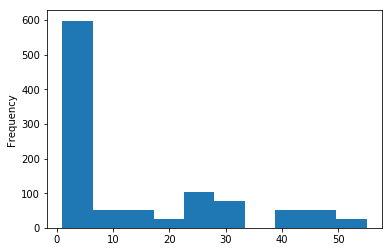

In [41]:
df.UPDRS.plot.hist()

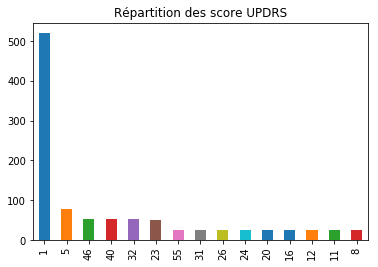

In [40]:
title = "Répartition des score UPDRS"
to_plot = df.UPDRS.value_counts(dropna=False)
to_plot.plot.bar(title=title)

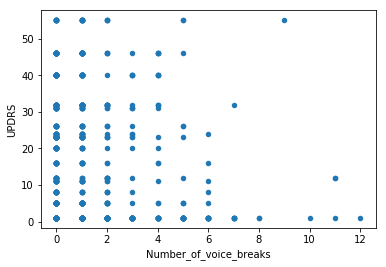

In [38]:
df.plot.scatter("Number_of_voice_breaks", "UPDRS")

# Train Test Split

In [14]:
#Read data 
target = df.class_information
df.drop(['class_information'], axis='columns', inplace=True)
x = df


In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.33)

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# ALGO SVM

In [17]:
from sklearn import svm
algorithme = svm.SVC()
algorithme.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [18]:
from sklearn import cross_validation
cross_validation.cross_val_score(algorithme, x, target, n_jobs=-1)

array([0.50432277, 0.49710983, 0.50289017])

In [19]:
#Aller au delà des params par défauts 

from sklearn import grid_search
parameters = {  'gamma' : [0.1,0.01, 0.001, 0.0001]           ,
                 "probability" : [True]}
grid       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_.score(X_test, y_test))

print(grid)

/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.8922413793103449 0.9037900874635568
GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': [0.1, 0.01, 0.001, 0.0001], 'probability': [True]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [20]:
parameters = {  'C'      : [1,10, 100]             ,
                'gamma' : [0.1,0.01, 0.001, 0.0001]
                      }
grid = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9956896551724138 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [21]:
parameters = {  'C'      : [1,10, 100]             ,
                'gamma' : [0.1,0.01, 0.001, 0.0001],
                'kernel' : ['rbf', 'poly', 'sigmoid']
                 }
grid = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9956896551724138 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Tester tous les algos

In [22]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in sklearn.__dict__['__all__']:    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [23]:
algos = get_sklearn_algorithms(True)
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))

['_ASSUME_FINITE', '__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_contextmanager', 'base', 'clone', 'config_context', 'cross_validation', 'exceptions', 'externals', 'feature_selection', 'gaussian_process', 'get_config', 'grid_search', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'multiclass', 'neighbors', 'os', 'preprocessing', 'random_projection', 're', 'set_config', 'setup_module', 'svm', 'sys', 'utils', 'warnings']
calibration
 nom algorithme  =  CalibratedClassifierCV
 nom algorithme  =  IsotonicRegression
 nom algorithme  =  LabelBinarizer
 nom algorithme  =  LabelEncoder
 nom algorithme  =  LinearSVC
 nom algorithme  =  _CalibratedClassifier
 nom algorithme  =  _SigmoidCalibration
cluster
 nom algorithme  =  AffinityPropagation
 nom algorithme  =  AgglomerativeClustering
 nom algorithme  =  Birch
 nom algorithme  =  DBSCAN


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [24]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [25]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print("="*30)

Probability calibration w
1.0
Isotonic regression model
X should be a 1d array
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode labels with value
fit() takes 2 positional arguments but 3 were give
Linear Support Vector Cla
1.0
__init__() missing 1 required positional argument:
Sigmoid regression model.
bad input shape (696, 27)
Perform Affinity Propagat
'AffinityPropagation' object has no attribute 'sco
Agglomerative Cluste
'AgglomerativeClustering' object has no attribute 
Implements the Birch clus
'Birch' object has no attribute 'score'
Perform DBSCAN clustering
'DBSCAN' object has no attribute 'score'
Agglomerate features.
'FeatureAgglomeration' object has no attribute 'sc
K-Means clustering

    R
-5043.890091063237
Mean shift clustering usi


/anaconda3/lib/python3.7/site-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


'MeanShift' object has no attribute 'score'
Mini-Batch K-Means cluste
-5099.450454653226
Spectral biclustering (Kl
'SpectralBiclustering' object has no attribute 'sc
Apply clustering to a pro
'SpectralClustering' object has no attribute 'scor
Spectral Co-Clustering al
'SpectralCoclustering' object has no attribute 'sc
An object for detecting o


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.43731778425655976
Maximum likelihood covari
-5.16650273532867
Sparse inverse covariance


/anaconda3/lib/python3.7/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: 9.061e-02
  ConvergenceWarning)


-18.038015493026126
Sparse inverse covariance
-26.59757629906126
LedoitWolf Estimator
-19.21355035358863
Minimum Covariance Determ
-246.23222468670733
Oracle Approximating Shri
-18.17507395650929
Covariance estimator with
-22.629417938091656
CCA Canonical Correlation
-0.004434958744015338
PLSCanonical implements
-0.2524665726606077
PLS regression

    PLSRe
0.4892086531706772
Partial Least Square SVD
'PLSSVD' object has no attribute 'score'
Dictionary learning


/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


'DictionaryLearning' object has no attribute 'scor
Factor Analysis (FA)
-26.330355407748677
FastICA
'FastICA' object has no attribute 'score'
Incremental principal com
'IncrementalPCA' object has no attribute 'score'
Kernel Principal componen
'KernelPCA' object has no attribute 'score'
Latent Dirichlet Allocati
Negative values in data passed to LatentDirichletA
Mini-batch dictionary lea
'MiniBatchDictionaryLearning' object has no attrib
Mini-batch Sparse Princip
'MiniBatchSparsePCA' object has no attribute 'scor
Non-Negative Matrix Facto
Negative values in data passed to NMF (input X)
Principal component analy
-5.1577769000690905
Principal component analy
'RandomizedPCA' object has no attribute 'score'
__init__() missing 1 required positional argument:
Sparse Principal Componen
'SparsePCA' object has no attribute 'score'
Dimensionality reduction
'TruncatedSVD' object has no attribute 'score'
DummyClassifier is a
0.478134110787172
DummyRegressor is a
-0.006622803201136619
An AdaBoost cl

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'IsolationForest' object has no attribute 'score'
A random forest classifie
0.9941690962099126
A random forest regressor
1.0
An ensemble of totally ra
'RandomTreesEmbedding' object has no attribute 'sc
__init__() missing 1 required positional argument:
Transforms lists of featu
'numpy.ndarray' object has no attribute 'items'
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Univariate feature select
'GenericUnivariateSelect' object has no attribute 
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Filter
'SelectFdr' object has no attribute 'score'
Filter
'SelectFpr' object has no attribute 'score'
__init__() missing 1 required positional argument:
Filter
'SelectFwe' object has no attribute 'score'
Select features according
'SelectKBest' object has no attribute 'score'
Select features according
'SelectPercentile' object has no attribute 'score'
Feature selector that rem
'VarianceThreshold' object has no attribu

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/

'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
'RandomizedLogisticRegression' object has no attri
Linear least squares with
0.6000410404331271
Ridge regression with bui
0.5990863374801008
Classifier using Ridge re
0.8746355685131195
Ridge classifier with bui
0.8629737609329446
Linear classifiers (SVM,
0.8279883381924198
Linear model fitted by mi
0.5948463435583223
Theil-Sen Estimator


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.34900099527328643
Isomap Embedding

    Non
'Isomap' object has no attribute 'score'
Locally Linear Embedding
'LocallyLinearEmbedding' object has no attribute '
Multidimensional scaling
'MDS' object has no attribute 'score'
Spectral embedding for no
'SpectralEmbedding' object has no attribute 'score
t-distributed Stochastic
'TSNE' object has no attribute 'score'
Variational Bayesian esti
-8.919805415280198
Dirichlet Process Gaussia
[ -64.04957856  -53.59589594  -48.28664126  -50.53053631  -47.6009751
  -46.44814912  -49.92441134  -45.16019187  -45.55344758  -45.09468296
  -47.55013048  -50.03413908  -45.51688509  -46.46293081  -46.34187854
  -45.57156302  -46.74082194  -47.09974782  -46.04008233  -51.31527957
  -57.58031306  -45.59548808  -46.81219778  -51.00431417  -52.55115284
  -47.62586302  -60.4238865   -56.95600493  -45.7522209   -83.19707992
  -74.62208108  -48.10443188  -45.99236281  -50.05897991  -51.04696834
  -45.03479355  -50.41515107  -46.31915368  -47.70386215  -59.7751

/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:378: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (27 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


'BernoulliRBM' object has no attribute 'score'
Multi-layer Perceptron cl


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9854227405247813
Multi-layer Perceptron re
0.782160984264967
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Imputation transformer fo
'Imputer' object has no attribute 'score'
Center a kernel matrix
'KernelCenterer' object has no attribute 'score'
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode labels with value
fit() takes 2 positional arguments but 3 were give
Scale each feature by its
'MaxAbsScaler' object has no attribute 'score'
Transforms features by sc
'MinMaxScaler' object has no attribute 'score'
Transform between iterabl
fit() takes 2 positional arguments but 3 were give
Normalize samples individ
'Normalizer' object has no attribute 'score'
Encode categorical intege
X needs to contain only non-negative integers.
Generate polynomial and i
'Po

/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.8775510204081632
Nu Support Vector Regress
0.7311666175208398
Unsupervised Outlier Dete
'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
0.9067055393586005
Epsilon-Support Vector Re
0.735171201578702
'module' object is not callable
A decision tree classifie
1.0
A decision tree regressor
1.0
An extremely randomized t
0.8425655976676385
An extremely randomized t
1.0
Linear Discriminant Analy
0.8746355685131195
Quadratic Discriminant An
1.0
Standardize features by r
'StandardScaler' object has no attribute 'score'


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [26]:
best_algorithm

CalibratedClassifierCV(base_estimator=None, cv=3, method='sigmoid')

In [27]:
performances

{'An object for detecting o': [0.43731778425655976],
 'PLS regression\n\n    PLSRe': [0.4892086531706772],
 'DummyClassifier is a': [0.478134110787172],
 'An extra-trees classifier': [0.9620991253644315],
 'Gradient Boosting for reg': [0.9999996047989534],
 'A random forest classifie': [0.9941690962099126],
 'The legacy Gaussian Proce': [0.7357270984095796],
 'Gaussian process classifi': [0.8658892128279884],
 'Gaussian process regressi': [0.02983397167419599],
 'Bayesian ARD regression.': [0.6030300090547246],
 'Bayesian ridge regression': [0.598801612423165],
 'Elastic Net model with it': [0.6015575036039634],
 'Linear regression model t': [0.5650583808394598],
 'Least Angle Regression mo': [0.39534079330195304],
 'Cross-validated Least Ang': [0.5968551345098292],
 'Lasso linear model with i': [0.6019822784661055],
 'Cross-validated Lasso, us': [0.6028511523968769],
 'Lasso model fit with Lars': [0.6026532683251903],
 'Ordinary least squar': [0.6035223809732261],
 'Logistic Regressio

In [28]:
import pandas as pd
df_performances = pd.DataFrame(performances).T

col_name = "performance"
df_performances.columns = [col_name]

df_performances = df_performances.sort_values(col_name)

In [29]:
df_performances

,performance
Gaussian process regressi,0.029834
Passive Aggressive Regres,0.069470
Theil-Sen Estimator,0.349001
Least Angle Regression mo,0.395341
An object for detecting o,0.437318
Linear Support Vector Reg,0.465831
DummyClassifier is a,0.478134
PLS regression\n\n PLSRe,0.489209
Regression based on k-nea,0.531624
Linear regression model t,0.565058


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

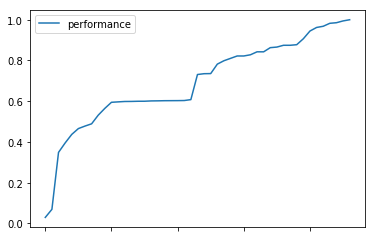

In [31]:
df_performances = df_performances.sort_values(col_name)
ax = df_performances.plot(rot=45, x_compat=True)

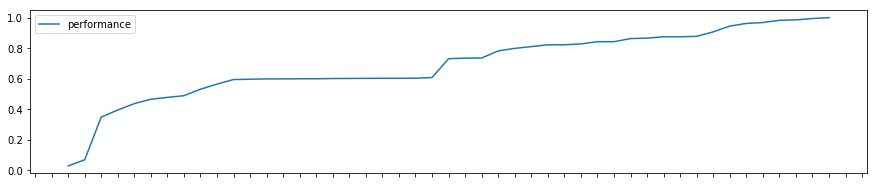

In [33]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(15,3)
df_performances = df_performances.sort_values(col_name )
axes.xaxis.set_ticklabels(df_performances.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df_performances.plot(rot=45, ax=axes)

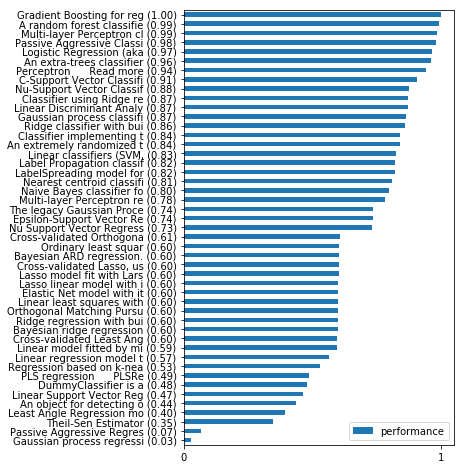

In [34]:
new_labels = []
for i, index in enumerate(df_performances.index):
    new_label = "%s (%.2f)"%(index,df_performances.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df_performances.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df_performances.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass